#1. Tratando os dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import lifelines
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve 
from sklearn.metrics import brier_score_loss

In [ ]:
dados = pd.read_csv("/content/dados.csv")

In [ ]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0468-YRPXN,Male,0,No,No,29,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.80,2807.1,No
1,3865-QBWSJ,Male,1,No,Yes,38,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,80.45,3162.65,No
2,4003-OCTMP,Female,0,Yes,No,31,Yes,No,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No
3,2091-RFFBA,Female,1,No,No,31,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.90,2217.15,Yes
4,9221-OTIVJ,Female,1,No,No,14,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.85,1531.4,Yes


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6620 non-null   object 
 1   gender            6620 non-null   object 
 2   SeniorCitizen     6620 non-null   int64  
 3   Partner           6620 non-null   object 
 4   Dependents        6620 non-null   object 
 5   tenure            6620 non-null   int64  
 6   PhoneService      6620 non-null   object 
 7   MultipleLines     6620 non-null   object 
 8   InternetService   6620 non-null   object 
 9   OnlineSecurity    6620 non-null   object 
 10  OnlineBackup      6620 non-null   object 
 11  DeviceProtection  6620 non-null   object 
 12  TechSupport       6620 non-null   object 
 13  StreamingTV       6620 non-null   object 
 14  StreamingMovies   6620 non-null   object 
 15  Contract          6620 non-null   object 
 16  PaperlessBilling  6620 non-null   object 


In [ ]:
dados = dados.dropna()

In [ ]:
dados['SeniorCitizen'] = dados['SeniorCitizen'].astype(object)

In [ ]:
dados.Churn = dados.Churn.map({'Yes':1,'No':0})

In [ ]:
dados = dados.drop(columns = ['customerID', 'TotalCharges']) #lembrar de tentar converter TotalCharges para float

In [ ]:
dados = pd.get_dummies(dados, columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines', 'InternetService', \
                                         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', \
                                         'Contract','PaperlessBilling','PaymentMethod'], drop_first = True)

# 2. Modelagem (Alerta)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados.drop('Churn',axis=1), \
                                                    dados['Churn'], test_size=0.30, \
                                                    random_state=111) 

## Logistic Regression

In [ ]:
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = reglog.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1442
           1       0.67      0.54      0.60       544

    accuracy                           0.80      1986
   macro avg       0.75      0.72      0.73      1986
weighted avg       0.79      0.80      0.79      1986

[[1295  147]
 [ 249  295]]
0.8006042296072508


## Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions2 = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1442
           1       0.51      0.50      0.51       544

    accuracy                           0.73      1986
   macro avg       0.66      0.66      0.66      1986
weighted avg       0.73      0.73      0.73      1986

[[1180  262]
 [ 270  274]]
0.7321248741188319


## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
predictions3 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions3))
print(confusion_matrix(y_test,predictions3))
print(accuracy_score(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1442
           1       0.64      0.48      0.55       544

    accuracy                           0.78      1986
   macro avg       0.73      0.69      0.70      1986
weighted avg       0.77      0.78      0.77      1986

[[1296  146]
 [ 282  262]]
0.7844914400805639


## Support Vector Classifier

In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions4 = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions4))
print(confusion_matrix(y_test,predictions4))
print(accuracy_score(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1442
           1       0.71      0.42      0.53       544

    accuracy                           0.79      1986
   macro avg       0.76      0.68      0.70      1986
weighted avg       0.78      0.79      0.77      1986

[[1349   93]
 [ 316  228]]
0.7940584088620343


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [ ]:
grid.fit(X_train,y_train)

## Naive Bayes

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [ ]:
predictions5 = nbc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions5))
print(confusion_matrix(y_test, predictions5))
print(accuracy_score(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1442
           1       0.44      0.90      0.59       544

    accuracy                           0.66      1986
   macro avg       0.69      0.73      0.65      1986
weighted avg       0.80      0.66      0.68      1986

[[821 621]
 [ 55 489]]
0.6596173212487412


# 3. Modelagem (Análise de Sobrevida)

In [ ]:
kmf = lifelines.KaplanMeierFitter()

In [ ]:
kmf.fit(durations = dados['tenure'], event_observed = dados['Churn'], 
        label = 'Estimativa')

<lifelines.KaplanMeierFitter:"Estimativa", fitted with 6620 total observations, 4873 right-censored observations>

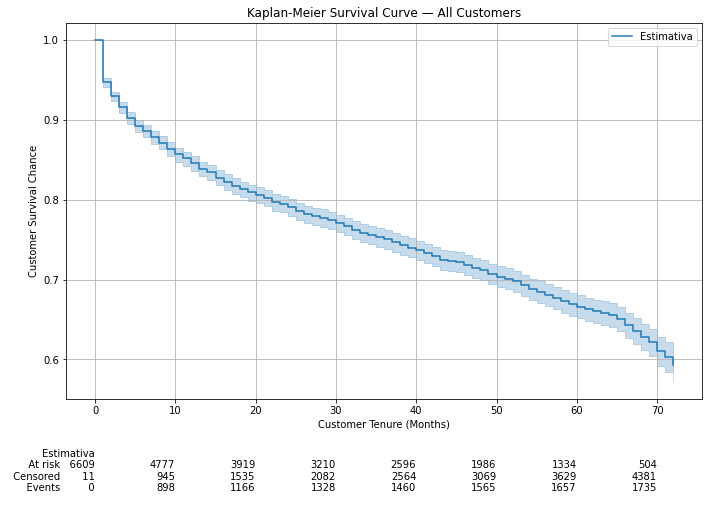

In [ ]:
# Plot KM curve
fig, ax = plt.subplots(figsize = (10,7))
kmf.plot(at_risk_counts = True, ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance')
ax.grid();